<p align="right"><i>Data Analysis for the Social Sciences - Part II - YYYY-MM-DD</i></p>

# Week 11 - Multivariate Data Analysis

Welcome to Part II of Data Analysis for the Social Sciences. In this lab session we will conduct a range of multivariate analyses of combinations of categorical and numeric variables.

We will use real data from the *British Social Attitudes survey, 2019: Poverty and Welfare*, specifically the open dataset available from the UK Data Service: https://doi.org/10.5255/UKDA-SN-8850-1

We will structure our analyses around the following research question:

<p><center><i>Are attitudes to welfare associated with sex, age, interest in politics, and perception of benefits fraud?</i></center></p>

### Aims

This lesson - **Multivariate Data Analysis** - has two aims:
1. Demonstrate how to analyse associations when there are three or more variables.
2. Cultivate your computational skills through the use of the statistical programming langauge *R*. For example, there are a number of opportunities for you to amend or write R syntax (code).

### Lesson details

* **Level**: Introductory, for individuals with minimal prior knowledge or experience of quantitative data analysis.
* **Duration**: 45-60 minutes.
* **Pre-requisites**: Completed [*Univariate Data Analysis*](./dass-week-9-univariate-analysis.ipynb) and [*Bivariate Data Analysis*](./dass-week-10-bivariate-analysis.ipynb) lessons.
* **Programming language**: R.
* **Learning outcomes**:
	1. Understand how to use R for conducting multivariate data analysis.
	2. Understand how to select and apply common data analysis techniques for categorical and numeric variables.

## Guide to using this resource

This learning resource was built using <a href="https://jupyter.org/" target=_blank>Jupyter Notebook</a>, an open-source software application that allows you to mix code, results and narrative in a single document. As <a href="https://jupyter4edu.github.io/jupyter-edu-book/" target=_blank>Barba et al. (2019)</a> espouse:
> In a world where every subject matter can have a data-supported treatment, where computational devices are omnipresent and pervasive, the union of natural language and computation creates compelling communication and learning opportunities.

If you are familiar with Jupyter notebooks then skip ahead to the main content (*Introduction to multivariate data analysis*). Otherwise, the following is a quick guide to navigating and interacting with the notebook.

### Interaction

**You only need to execute the code that is contained in sections which are marked by `[]`.**

To execute a cell, click or double-click the cell and press the `Play` button next to the cell or select the `Run` button on the top toolbar (*Runtime > Run the focused cell*); you can also use the keyboard shortcuts `Shift + Enter` or `Ctrl + Enter`).

Try it for yourself:

In [ ]:
name <- readline(prompt="Enter name: ")
print(paste("Hi,", name, "enjoy learning more about R and multivariate analysis!"))

Notebooks are sequential, meaning code should be executed in order (top to bottom). For example, the following code won't work:

In [ ]:
x * 5

As the error message suggests, there is no object (variable) called `x`, therefore we cannot do any calculations with it. 

Let's try a sequential approach:

In [ ]:
x <- 10 # create an object called 'x' and give it the value '10'

In [ ]:
x * 5 # multiply 'x' by 5

### Learn more

Jupyter notebooks provide rich, flexible features for conducting and documenting your data analysis workflow. To learn more about additional notebook features, we recommend working through some of the <a href="https://github.com/darribas/gds19/blob/master/content/labs/lab_00.ipynb" target=_blank>materials</a> provided by Dani Arribas-Bel at the University of Liverpool. 

### Learner input

Throughout the lessons there are times when you need to do the following activities:
* **TASK:** A coding task for you to complete (e.g. analyse different variables).
* **QUESTION:** A question regarding your interpretation of some code or a technique (e.g. what is the piece of code doing?).
* **EXERCISE:** A data analysis challenge for you to complete.

## Introduction to multivariate data analysis

In the [**Bivariate data analysis** lesson](https://github.com/DiarmuidM/data-analysis-for-the-social-sciences-2023/blob/main/lessons/dass-week-10-bivariate-analysis.ipynb), we learned how to summarise more than one variable at a time, in particular how to assess whether two variables are related. However as quantitative social scientists are fond of saying: it's a multivariate world. That is, there are often many predictors of an outcome, and simply producing lots of bivariate analyses will not capture the complexity and nuance of a social phenomenon. For example, consider the following research question:
* [Is there a difference in the earnings of men and women?](https://doi.org/10.1177%2F0095399716636928)

We can produce an answer to this question by comparing data on hourly pay for men and women. Say we find a difference in earnings:
* Is this the case for all age groups? Or is it really only older men who earn more than older women, and it is this difference that produces the association between earnings and sex?

Thus in this lesson we will focus on making comparisons using three or more variables of interest. This does not involve any new summary statistics or measures of association; instead we repeat our previous techniques but in the context of additional variables: e.g., attitudes to welfare across combinations of age group **and** sex.

Specifically, we will cover the following scenarios:
1. When you have one numeric variable and two categorical variables.
2. When you have two numeric variables and one categorical variable.
3. When you have three categorical variables.

Let's look at some multivariate techniques of analysis using the *British Social Attitudes survey* data.

## Multivariate Data Analysis

### Importing data

The first step is to import the *British Social Attitudes survey* data for analysis.

In [1]:
bsa2019 <- read.table("https://raw.githubusercontent.com/DiarmuidM/data-analysis-for-the-social-sciences-2023/main/lessons/data/bsa2019_poverty_open.tab", header=TRUE, na="NA", sep="\t")
head(bsa2019) # view the first six observations

,Sserial,WtFactor,RSex,RAgeCat,eq_inc_quintiles,RClassGp,HEdQual3,Married,ChildHh,skipmeal,⋯,Dole,TaxSpend,MuchPov,Poverty1,Poverty2,NatFrEst,incdiffs,welfare2,leftrigh,libauth
,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>
1,310001,0.9119594,2,6,-1,1,2,1,2,-1,⋯,3,3,8,2,1,5,-1,2.500,2.4,3.500000
2,310002,0.4439626,2,3,5,1,2,2,2,1,⋯,2,3,2,2,2,30,2,3.125,2.0,3.833333
3,310003,1.2182741,2,4,-1,1,3,1,1,-1,⋯,2,2,2,2,2,50,-1,3.125,2.2,4.166667
4,310004,1.5839969,1,2,4,1,2,4,2,-1,⋯,3,3,2,2,1,50,-1,2.250,3.2,2.166667
5,310005,0.4743091,1,6,-1,5,4,4,2,1,⋯,2,3,1,2,1,50,4,3.375,1.6,4.666667
6,310006,1.1363125,1,4,1,3,8,1,1,-1,⋯,2,2,1,1,1,10,-1,2.875,1.8,3.666667


In [2]:
names(bsa2019)

[1] "Sserial"          "WtFactor"         "RSex"             "RAgeCat"         
 [5] "eq_inc_quintiles" "RClassGp"         "HEdQual3"         "Married"         
 [9] "ChildHh"          "skipmeal"         "paptype"          "SMNews"          
[13] "PartyId2"         "Politics"         "SocTrust"         "Spend1"          
[17] "Dole"             "TaxSpend"         "MuchPov"          "Poverty1"        
[21] "Poverty2"         "NatFrEst"         "incdiffs"         "welfare2"        
[25] "leftrigh"         "libauth"

### Data cleaning

There are a number of important steps that need to be executed before proceeding with the analysis:
* Handling missing values
* Labelling values of categorical variables

We cover these techniques in a separate notebook: [Data Cleaning](./dass-bsa-data-cleaning.ipynb) 

**Please note that you will be expected to perform these tasks for your own analysis.**

In [3]:
bsa2019$welfare2[bsa2019$welfare2<1 | bsa2019$welfare2>5] <- NA # convert "-1" and "9" to missing

In [4]:
bsa2019$NatFrEst[bsa2019$NatFrEst>100] <- NA # convert "998" and "999" to missing

In [5]:
bsa2019$RSex <- factor(bsa2019$RSex, levels = c(1,2), labels = c("Male", "Female"))

In [6]:
bsa2019$RAgeCat <- factor(bsa2019$RAgeCat, levels = c(1,2,3,4,5,6,7), labels = c("18-24", "25-34", "35-44", "45-54", "55-59", "60-64", "65+"))

In [7]:
bsa2019$Married <- factor(bsa2019$Married, levels = c(1,2,3,4), labels = c("Married/living as married", 
                                                                               "Separated/divorced", 
                                                                               "Widowed", 
                                                                               "Never married"))

In [8]:
bsa2019$HEdQual3 <- factor(bsa2019$HEdQual3, levels = c(1,2,3,4), labels = c("Degree", "Below degree / A level", "O level", "No qual"))

### One Numeric and Two Categorical

Let's build up to our multivariate analysis by first showing some univariate and bivariate analyses. Recall the `welfare2` variable is a measure of how sympathetic a respondent is to welfare claimants and the welfare system more generally: values closer to 1 represent very sympathetic attitudes, values closer to 5 represent very unsympathetic attitudes.

In [9]:
summary(bsa2019$welfare2)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  1.000   2.308   2.750   2.731   3.125   5.000     642 

In [10]:
sd(bsa2019$welfare2, na.rm=TRUE)

[1] 0.6335641

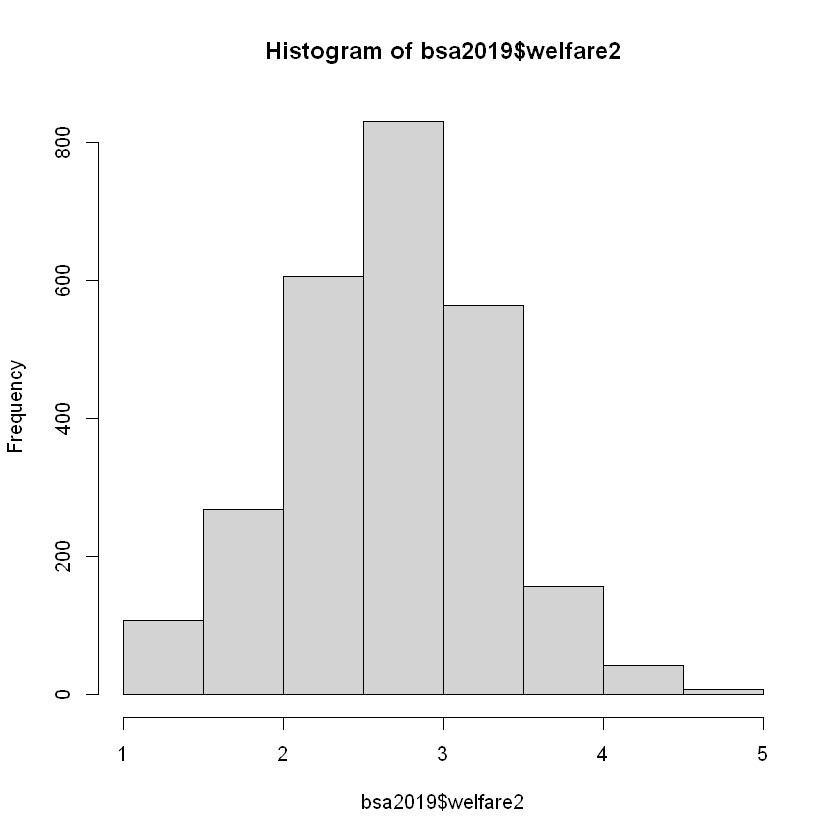

In [11]:
hist(bsa2019$welfare2)

We see that the average attitude is slightly more unsympathetic (greater than 2.5, the midpoint of the scale) and that most people are within .63 points of this average.

Now we want to examine whether the average attitude varies by age group or sex.

In [12]:
aggregate(welfare2 ~ RAgeCat, data = bsa2019, mean)

RAgeCat,welfare2
<fct>,<dbl>
18-24,2.731812
25-34,2.753604
35-44,2.784684
45-54,2.691574
55-59,2.725490
60-64,2.633702
65+,2.744916


Perhaps surprisingly(?), all age groups hold similar typical attitudes to welfare claimants in Britain.

In [13]:
aggregate(welfare2 ~ RSex, data = bsa2019, mean)

RSex,welfare2
<fct>,<dbl>
Male,2.745788
Female,2.718959


It appears females are slightly more likely to hold sympathetic attitudes than males (but only by a tiny difference).

We can now test whether the average attitude varies by age group **AND** sex.

In [14]:
aggregate(welfare2 ~ RAgeCat + RSex, data = bsa2019, mean)

RAgeCat,RSex,welfare2
<fct>,<fct>,<dbl>
18-24,Male,2.794765
25-34,Male,2.812628
35-44,Male,2.791301
45-54,Male,2.689267
55-59,Male,2.763750
60-64,Male,2.596222
65+,Male,2.758375
18-24,Female,2.680177
25-34,Female,2.710565


The above summary table allows us to compare differences between men and women of the same age group. For example, females aged 18-24 are slightly more sympathetic than males of the same age.

However the differences between males and females in each age group are small, and thus we can conclude the following:
* The association between attitudes to welfare and sex is consistent across age groups.
* The association between attitudes to welfare and age is consistent across sexes.

We can confirm this using the appropriate measure of association.

Recall that the appropriate measure of association when you have one categorical and one numeric variable is:
* *Eta squared*

This tells us the strength of the association but not the direction (we need to infer this from the summary tables above). *Eta squared* coefficient ranges from 0 to 1, with higher values representing stronger associations.

First let's create separate datasets for each age group (I know, sorry, *R* is a lot of work in this regard):

In [16]:
bsa2019_18_24 <- bsa2019[bsa2019$RAgeCat=="18-24",]
bsa2019_25_34 <- bsa2019[bsa2019$RAgeCat=="25-34",]
bsa2019_35_44 <- bsa2019[bsa2019$RAgeCat=="35-44",]
bsa2019_45_54 <- bsa2019[bsa2019$RAgeCat=="45-54",]
bsa2019_55_59 <- bsa2019[bsa2019$RAgeCat=="55-59",]
bsa2019_60_64 <- bsa2019[bsa2019$RAgeCat=="60-64",]
bsa2019_65_over <- bsa2019[bsa2019$RAgeCat=="65+",]

And now let's calculate our measure of association for each age group.

In [ ]:
#install.packages("lsr") # install the necessary package - only needs to be done once

In [17]:
library(lsr) # import the package containing the `etaSquared()` command

In [18]:
model <- aov(welfare2 ~ RSex, data = bsa2019_18_24)
etaSquared(model)

,eta.sq,eta.sq.part
RSex,0.008042395,0.008042395


In [19]:
model <- aov(welfare2 ~ RSex, data = bsa2019_25_34)
etaSquared(model)

,eta.sq,eta.sq.part
RSex,0.005550542,0.005550542


In [20]:
model <- aov(welfare2 ~ RSex, data = bsa2019_35_44)
etaSquared(model)

,eta.sq,eta.sq.part
RSex,7.734905e-05,7.734905e-05


In [21]:
model <- aov(welfare2 ~ RSex, data = bsa2019_45_54)
etaSquared(model)

,eta.sq,eta.sq.part
RSex,1.034754e-05,1.034754e-05


In [23]:
model <- aov(welfare2 ~ RSex, data = bsa2019_55_59)
etaSquared(model)

,eta.sq,eta.sq.part
RSex,0.003103004,0.003103004


In [25]:
model <- aov(welfare2 ~ RSex, data = bsa2019_60_64)
etaSquared(model)

,eta.sq,eta.sq.part
RSex,0.003355482,0.003355482


In [24]:
model <- aov(welfare2 ~ RSex, data = bsa2019_65_over)
etaSquared(model)

,eta.sq,eta.sq.part
RSex,0.0004674906,0.0004674906


Just as we suspected: the association is consistent (i.e., non-existent) across all age groups.

**TASK**: conduct a multivariate analysis of attitude to welfare (`welfare2`), sex (`RSex`) and level of education (`HEdQual3`).

In [ ]:
# INSERT CODE HERE

### Two Numeric and One Categorical

We perform this type of multivariate analysis by considering whether bivariate association between the two numeric variables changes across values of a categorical variable. For example, is the association between welfare attitudes and perceptions of benefits fraud the same for males and females?

First we describe and measure the bivariate association between the two numeric variables:

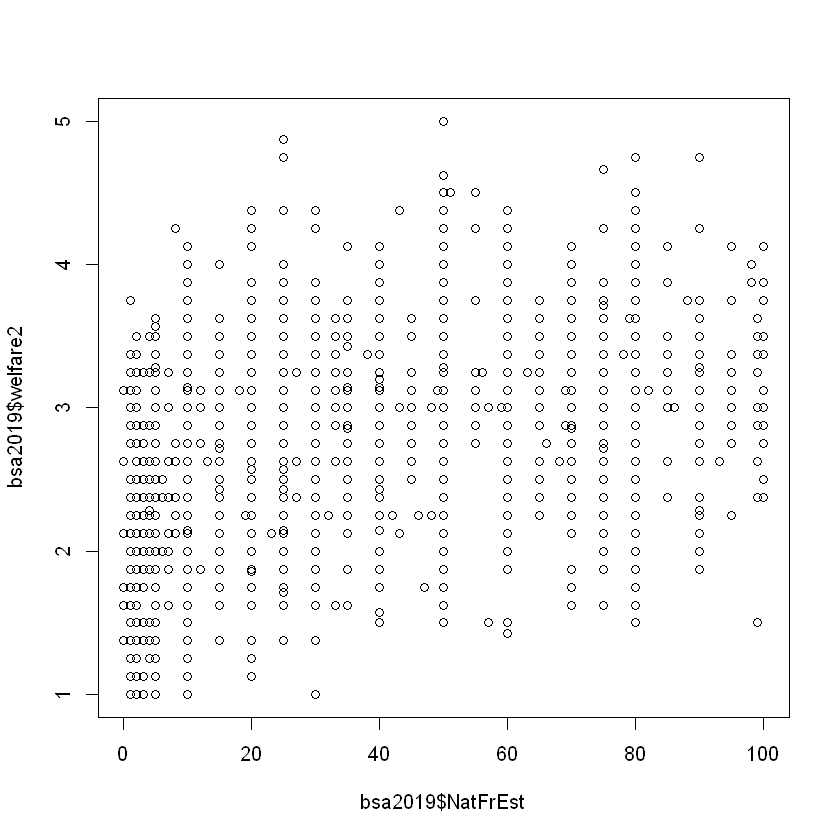

In [26]:
plot(bsa2019$NatFrEst, bsa2019$welfare2) # X variable (axis) is listed first, Y variable (axis) second

A visual inspection of the joint distribution reveals a pattern: the more people a respondent thinks is committing benefit fraud, the less sympathetic their attitude is to wlefare claimants / welfare system more generally.

In [27]:
cor(bsa2019$NatFrEst, bsa2019$welfare2, use = "complete.obs")

[1] 0.4032543

The correlation coefficient confirms our interpretation: there is a moderate, positive association. That is, attitudes to welfare are less sympathetic at higher levels of perceived benefit fraud.

Do we find the same relationship between these variables for males and females?

In [28]:
bsa2019_males <- bsa2019[bsa2019$RSex=="Male",] # create a dataset containing only males
bsa2019_females <- bsa2019[bsa2019$RSex=="Female",] # create a dataset containing only females

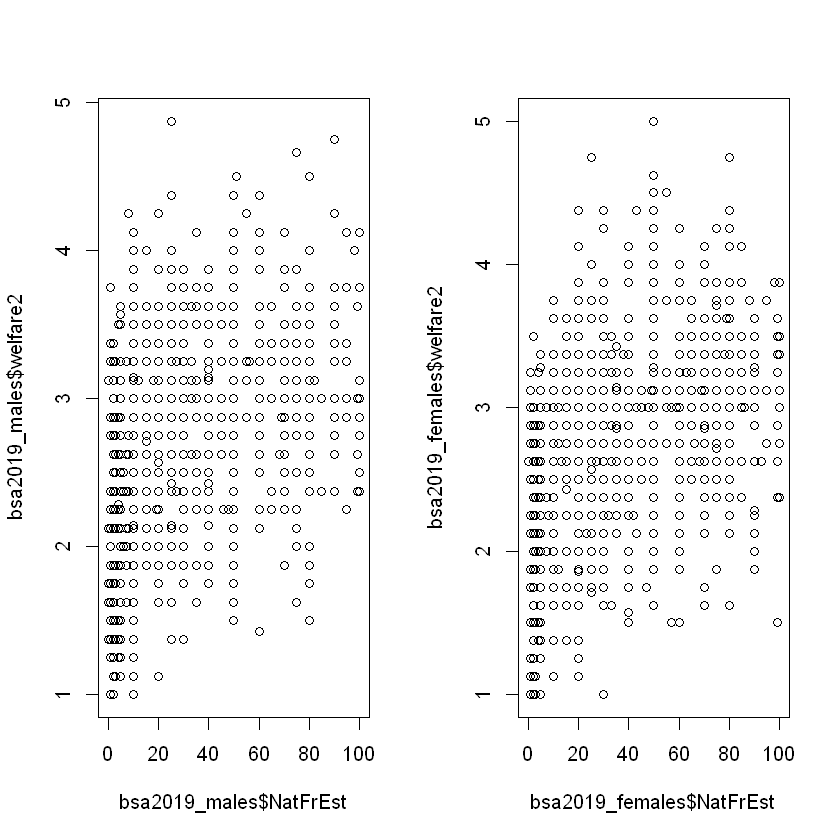

In [29]:
# create a figure with two plots
# set graphical parameters for a figure of one row, two columns
par(mfrow = c(1, 2))

plot(bsa2019_males$NatFrEst, bsa2019_males$welfare2)
plot(bsa2019_females$NatFrEst, bsa2019_females$welfare2) # X variable (axis) is listed first, Y variable (axis) second

It is difficult to tell by looking but it appears that the relationship between the two numeric variables is similar for males and females. We can confirm our intuition by calculating the correlation coefficient for males and females separately.

In [30]:
cor(bsa2019_males$NatFrEst, bsa2019_males$welfare2, use = "complete.obs")
cor(bsa2019_females$NatFrEst, bsa2019_females$welfare2, use = "complete.obs")

[1] 0.3952925

[1] 0.4158744

The association remains positive and moderate for both sexes.

**TASK**: conduct a multivariate analysis of attitude to welfare (`welfare2`), perception of benefit fraud (`NatFrEst`) and level of education (`HEdQual3`).

In [ ]:
# INSERT CODE HERE

### Three Categorical

Finally, we consider situations where we have three categorical variables. In this instance it is best to think of one of these variables as your outcome, and the other two as potential predictors / explanatory factors. This will aid your interpretation of the tables and graphs that we will produce.

Let's start with our measure of level of education (`HEdQual3`) and consider whether the distribution of this variable varies across two other categorical variables: age group (`RAgeCat`) and sex (`RSex`). 

(Or to put another way: can we predict a person's level of education using knowledge of their age and sex?)

We begin by examining the distribution of our outcome / dependent variable.

In [34]:
round(prop.table(table(bsa2019$HEdQual3)) * 100, 0)


                Degree Below degree / A level                O level 
                    25                     27                     26 
               No qual 
                    22 

We can analyse the joint distribution with age group or sex as follows:

In [35]:
qual_age_table <- table(bsa2019$RAgeCat, bsa2019$HEdQual3)
round(prop.table(qual_age_table, 1)* 100, 0) # row percentages

       
        Degree Below degree / A level O level No qual
  18-24     21                     43      27       9
  25-34     37                     30      20      13
  35-44     38                     29      21      11
  45-54     30                     27      32      11
  55-59     20                     32      33      15
  60-64     21                     26      34      18
  65+       14                     20      24      42

In [36]:
qual_sex_table <- table(bsa2019$RSex, bsa2019$HEdQual3)
round(prop.table(qual_sex_table, 1)* 100, 0) # row percentages

        
         Degree Below degree / A level O level No qual
  Male       25                     27      27      21
  Female     25                     27      26      22

It is quite simple to add an extra categorical variable to a crosstabulation; again most of the work in *R* is focused on presenting the table in a readable manner.

To help us when interpreting the table, we will define our analysis as follows:
* Is there an association between level of education and age?
* Does this association vary across sexes?

In [39]:
qas_table <- table(bsa2019$RSex, bsa2019$RAgeCat, bsa2019$HEdQual3) # create crosstabulation - variable 1 is the control variable,
# variable 2 is the X (predictor) variable, variable 3 is the Y (outcome) variable.

qas_prop_table <- addmargins(prop.table(qas_table, c(1,2)), 3) # calculate proportions

qas_perc_table <- round(ftable(qas_prop_table) * 100, 0) # convert proportions to percentages

qas_perc_table # display table

              Degree Below degree / A level O level No qual Sum
                                                               
Male   18-24      24                     39      28       9 100
       25-34      36                     29      22      13 100
       35-44      36                     31      22      11 100
       45-54      29                     26      31      14 100
       55-59      19                     27      35      19 100
       60-64      23                     24      34      19 100
       65+        17                     23      24      36 100
Female 18-24      19                     46      25       9 100
       25-34      37                     30      19      14 100
       35-44      40                     27      21      12 100
       45-54      30                     28      33       9 100
       55-59      20                     38      31      10 100
       60-64      19                     29      35      17 100
       65+        12                    

Let's unpack the above table:
* Each row represents a combination of age and sex e.g., 18-24 year old females.
* Each column represents a category of the `HEdQual3` variable, including a final column capturing the sum of the row percentages in the table.
* The numbers in a particular row and column represent the percentage of respondents who fall into each category of the `HEdQual3` variable, for a given combination of age and sex.

Therefore we need to compare percentages down the rows of the table. For example, we observe that 46% of females in the 65+ age group do not have a qualification, compared to 36% of males of a similar age. However with the exception of the youngest and oldest age groups, females are more likely than males to have a degree.

Three-way crosstabulations are tricky to interpret, so be patient and careful when drawing conclusions from them.

**TASK**: Replace `RAgeCat` with `Married` in the above crosstabulation and interpret the crosstabulation.

In [ ]:
# INSERT CODE HERE

Let's calculate the Cramer's V measure of association between `RAgeCat` and `HEdQual3` for each sex. Thankfully we have already created the individual datasets corresponding to each sex:

In [40]:
#install.packages("DescTools") # install the necessary package - only needs to be done once

In [41]:
library(DescTools) # import the package containing the `CramerV()` command

In [42]:
CramerV(bsa2019_males$HEdQual3, bsa2019_males$RAgeCat)
CramerV(bsa2019_females$HEdQual3, bsa2019_females$RAgeCat)

[1] 0.1801415

[1] 0.2562262

We see some variation in the strength of the association across sexes. Broadly, it appears that the association is strongest for females. Put another way: the differences in level of education between age groups are larger for females than males.

## Conclusion

In this lesson we encountered a range of techniques for summarising more than three or more variables at a time.

There is another Week 11 lesson that focuses on a range of techniques for expressing the uncertainty inherent in our quantitative analyses.

In Week 12, we focus on producing publication-ready graphs and bringing all our learning together to write a report based on a piece of quantitative data analysis.